In [ ]:

import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = (train_labels).astype(np.int64)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = (test_labels).astype(np.int64)

11490434/11490434 [==============================] - 0s 0us/step


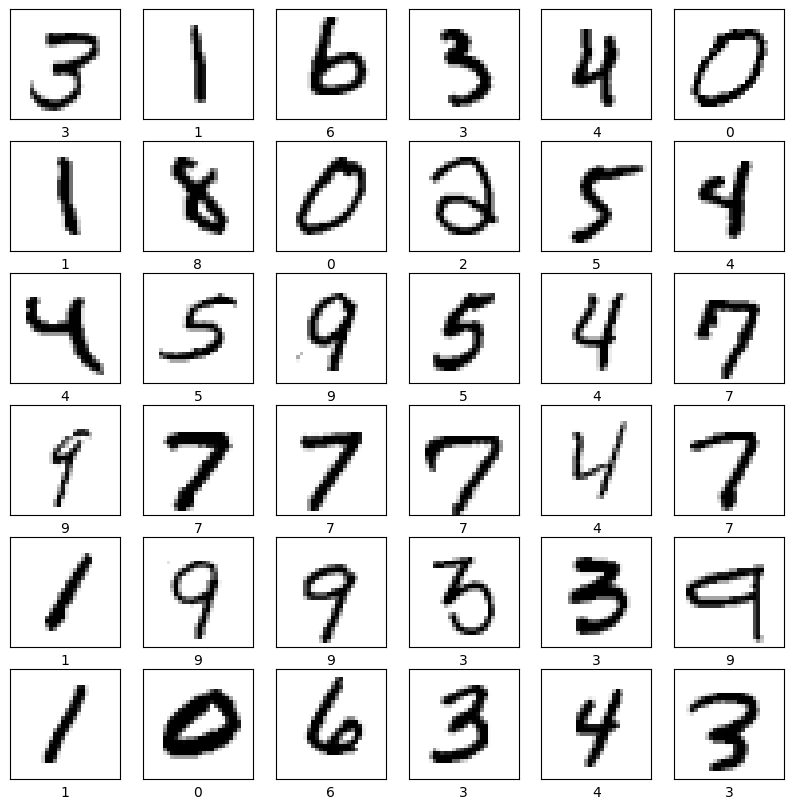

In [ ]:
plt.figure(figsize=(10,10))
random_inds = np.random.choice(60000,36)
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    plt.imshow(np.squeeze(train_images[image_ind]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[image_ind])

In [ ]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([


        tf.keras.layers.Conv2D(24, kernel_size = (3,3), activation = tf.nn.relu),

        tf.keras.layers.MaxPool2D(pool_size = (2,2)),

        tf.keras.layers.Conv2D(36, kernel_size=(3,3), activation = tf.nn.relu),

        tf.keras.layers.MaxPool2D(pool_size = (2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
    ])

    return cnn_model

cnn_model = build_cnn_model()
# Initialization
cnn_model.predict(train_images[[0]])
# Print the summary
print(cnn_model.summary())

1/1 [==============================] - 0s 185ms/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 36)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 

In [ ]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model.fit(train_images, train_labels, batch_size = 64, epochs=5)

Epoch 1/5
938/938 [==============================] - 34s 35ms/step - loss: 0.1786 - accuracy: 0.9471
Epoch 2/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0515 - accuracy: 0.9842
Epoch 3/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0357 - accuracy: 0.9887
Epoch 4/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0262 - accuracy: 0.9917
Epoch 5/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0214 - accuracy: 0.9936


In [ ]:
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0249 - accuracy: 0.9921


In [ ]:
predictions = cnn_model.predict(test_images)

313/313 [==============================] - 3s 8ms/step


In [ ]:
predictions[0]

array([6.4907413e-10, 1.0313098e-08, 5.9520996e-08, 2.7889843e-07,
       8.6368592e-09, 2.4409691e-10, 5.9667671e-14, 9.9999946e-01,
       1.1839076e-08, 8.6608317e-08], dtype=float32)

In [ ]:
prediction = np.argmax(predictions[0])

print(prediction)

7


Label of this digit is: 7


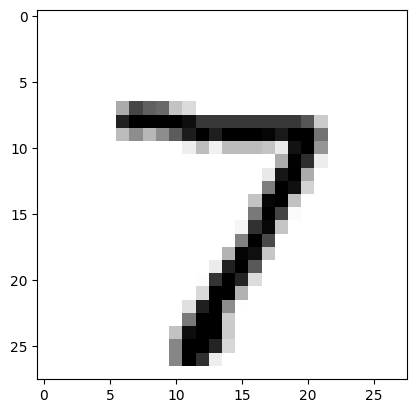

In [ ]:
print("Label of this digit is:", test_labels[0])
plt.imshow(test_images[0,:,:,0], cmap=plt.cm.binary)